# Шаги для подготовки модели к развертыванию:
Оптимизация модели:

Уменьшение размера модели: Это может включать в себя уменьшение количества слоев или нейронов в каждом слое. Для более сложных моделей можно применять техники квантования или прунинга.
Квантование: Позволяет снизить точность весов модели, например, с 32-битных чисел с плавающей точкой до 8-битных целых чисел, с минимальной потерей качества.
Проверка производительности модели: Убедитесь, что оптимизация не привела к значительной потере точности.
Использование подходящих инструментов:

Для iOS (устройства Apple) часто используется Core ML. Вы можете конвертировать обученную модель в формат Core ML с помощью инструмента, такого как coremltools.
Для Android можно использовать TensorFlow Lite. TensorFlow предоставляет инструменты для конвертации моделей в формат .tflite, который эффективно работает на мобильных устройствах.
Тестирование на устройствах:

После конвертации и интеграции модели в приложение проведите тестирование на разных устройствах, чтобы убедиться в её работоспособности и производительности.
Особое внимание уделите скорости инференса и потреблению памяти, так как эти факторы критически важны для мобильных устройств.

Для тестирования производительности и ресурсоэффективности модели машинного обучения на мобильных устройствах, важно оценить несколько ключевых параметров. Эти параметры включают время выполнения (инференса), потребление памяти, использование процессора и, при необходимости, использование графического процессора (GPU). Вот несколько подходов и инструментов, которые можно использовать для тестирования:

1. Время выполнения (скорость инференса)
Использование профайлеров:
Android Studio Profiler: Позволяет отслеживать использование CPU, памяти и сетевую активность вашего приложения в реальном времени. Вы можете использовать его для измерения времени, необходимого для выполнения инференса вашей модели.
Xcode Instruments: Инструменты для профилирования приложений на iOS, которые предоставляют детальную информацию о производительности приложения, включая время выполнения задач.
2. Потребление памяти
Memory Profiler в Android Studio и Instruments в Xcode: Эти инструменты позволяют отслеживать использование памяти вашим приложением. Они могут помочь выявить утечки памяти и другие проблемы, которые могут возникнуть при выполнении инференса модели.
3. Энергопотребление
Battery Profiler в Android Studio: Предоставляет информацию о том, как ваше приложение влияет на заряд батареи устройства.
Energy Log в Instruments для iOS: Помогает определить, как использование вашего приложения влияет на энергопотребление устройства.
4. Тестирование на реальных устройствах
Важно провести тестирование на реальных устройствах с различными характеристиками (в том числе на устройствах с низкими характеристиками), чтобы убедиться в том, что приложение работает корректно и эффективно использует ресурсы.
Практические шаги для тестирования:
Интеграция модели в приложение: После конвертации модели в соответствующий формат (например, .tflite или .mlmodel) интегрируйте её в ваше мобильное приложение.

Разработка тестовых сценариев: Создайте сценарии использования, которые имитируют реальные условия работы приложения. Это может включать инференс на живом видео, анализ изображений, обработку текста и т.д.

Запуск тестов и сбор данных: Используйте вышеупомянутые профайлеры и инструменты для сбора данных о производительности и ресурсоэффективности вашей модели в различных условиях.

Анализ результатов и оптимизация: Анализируйте полученные данные, идентифицируйте узкие места и проблемы. В зависимости от результатов, вы можете потребоваться дополнительная оптимизация модели или изменение логики приложения.

Тестирование на разных устройствах и в различных условиях поможет убедиться, что ваше приложение эффективно работает и оптимально использует ресурсы мобильного устройства, обеспечивая при этом необходимое качество инференса.

# Конвертация модели PyTorch в формат, совместимый с iOS, обычно включает в себя несколько шагов, включая оптимизацию модели и её экспорт в формат Core ML, который поддерживается устройствами Apple. Вот основные этапы процесса:

    Оптимизация модели PyTorch: Перед тем как конвертировать модель, важно убедиться, что она оптимизирована для эффективности на мобильных устройствах. Это может включать в себя уменьшение размера модели, прунинг (удаление неиспользуемых весов) и квантизацию.

    Экспорт в ONNX: Модель PyTorch можно экспортировать в формат ONNX, который является промежуточным стандартом для представления моделей машинного обучения. Это делается с помощью функции torch.onnx.export.

    Конвертация ONNX в Core ML: Для конвертации из ONNX в Core ML можно использовать инструмент onnx-coreml. Этот инструмент поддерживает прямую конвертацию и позволяет дополнительно адаптировать модель под нужды iOS.

    Интеграция в iOS приложение: После конвертации модели в Core ML, следующим шагом будет её интеграция в iOS-приложение. Это включает добавление .mlmodel файла в проект Xcode и использование Core ML API для работы с моделью.

    Тестирование на устройстве: Важно тестировать модель на реальном устройстве, чтобы убедиться, что она работает корректно и эффективно. Это включает проверку производительности и точности модели.

In [2]:
import torch
#import torch.onnx
#import onnx
#from onnx_coreml import convert
#from torchsummary import summary
import coremltools as ct
from torchinfo import summary


#from linRegres import MLPModel,LinearRegressionModel


Torch version 2.2.2 has not been tested with coremltools. You may run into unexpected errors. Torch 2.1.0 is the most recent version that has been tested.


In [3]:
loaded_model = torch.jit.load('YOLO_model_traced.pt')
input_trase_example = (torch.randn(1, 3, 640, 640) / 255.0)
#input_trase_example = torch.randn(10, 1)
summary(loaded_model, input_size=(1, 3, 640, 640))

Layer (type:depth-idx)                                  Output Shape              Param #
AutoShape                                               --                        --
├─DetectMultiBackend: 1-1                               --                        --
│    └─DetectionModel: 2-1                              --                        --
│    │    └─Sequential: 3-1                             --                        (7,225,885)
Total params: 7,225,885
Trainable params: 0
Non-trainable params: 7,225,885
Total mult-adds (Units.MEGABYTES): 0
Input size (MB): 4.92
Forward/backward pass size (MB): 0.00
Params size (MB): 28.90
Estimated Total Size (MB): 33.82

In [3]:
example_input = input_trase_example
# Конвертируем TorchScript модель в Core ML
mlmodel = ct.convert(
    loaded_model,
    inputs=[ct.TensorType(shape=example_input.shape)],  # Указываем тип и форму входных данных
    convert_to='neuralnetwork'
)

'''Можно запустить модель для проверки перед сохранением'''


# Сохраняем модель в файл
mlmodel.save("MyModel.mlmodel")

Model is not in eval mode. Consider calling '.eval()' on your model prior to conversion
Support for converting Torch Script Models is experimental. If possible you should use a traced model for conversion.
Running MIL default pipeline:   0%|          | 0/69 [00:00<?, ? passes/s]/Users/egorlogutov/Desktop/Github/ML-01/PyTorch_ConvertModel_To_Mobile/venvConvert/lib/python3.11/site-packages/coremltools/converters/mil/mil/passes/defs/preprocess.py:239: UserWarning: Input, 'ims.1', of the source model, has been renamed to 'ims_1' in the Core ML model.
  warnings.warn(msg.format(var.name, new_name))
/Users/egorlogutov/Desktop/Github/ML-01/PyTorch_ConvertModel_To_Mobile/venvConvert/lib/python3.11/site-packages/coremltools/converters/mil/mil/passes/defs/preprocess.py:267: UserWarning: Output, '871', of the source model, has been renamed to 'var_871' in the Core ML model.
  warnings.warn(msg.format(var.name, new_name))
Translating MIL ==> NeuralNetwork Ops: 100%|██████████| 610/610 [00:04<00:00

In [4]:
# Загрузите модель Core ML
mlmodel = ct.models.MLModel('MyModel.mlmodel')

In [5]:
spec = mlmodel.get_spec()
print(spec.description.input)

[name: "ims_1"
type {
  multiArrayType {
    shape: 1
    shape: 3
    shape: 640
    shape: 640
    dataType: FLOAT32
  }
}
]


In [6]:
print(spec.description.output)

[name: "var_871"
type {
  multiArrayType {
    dataType: FLOAT32
  }
}
]


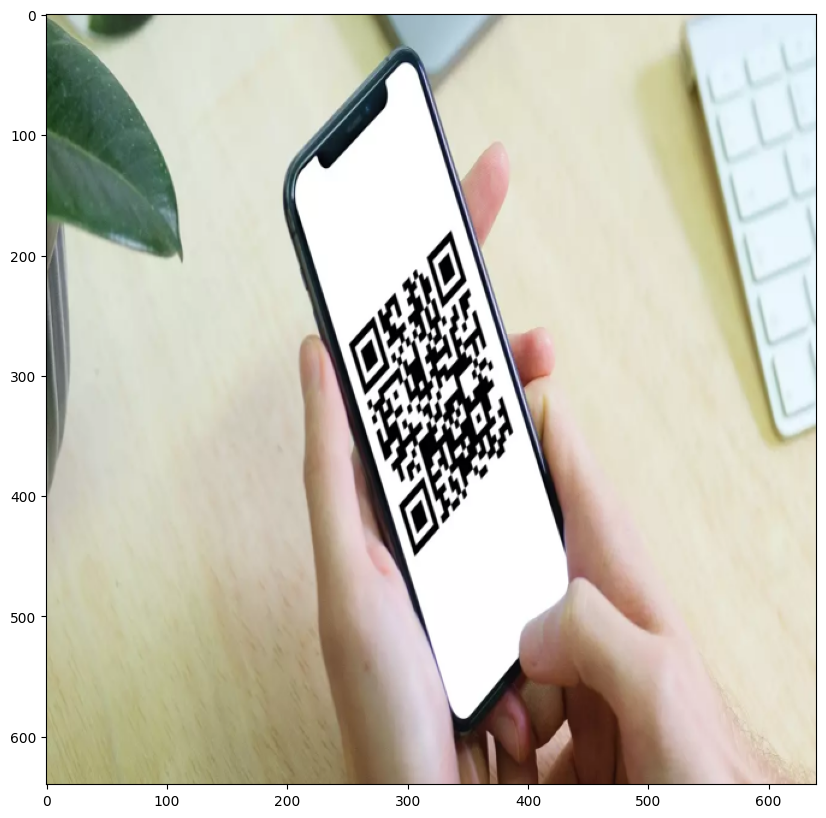

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches


image = Image.open('qr.webp')
image = image.resize((640, 640))

image_array = np.array(image)

image_array = image_array / 255.0

image_array = image_array.astype(np.float32)

if image_array.shape[2] == 3:  # если последняя ось - это каналы
    image_array = np.transpose(image_array, (2, 0, 1))
image_array = np.expand_dims(image_array, axis=0)


plt.figure(figsize=(10, 10))
plt.imshow(image)

In [8]:
value_input = image_array
input_data = {"ims_1": value_input}

prediction = mlmodel.predict(input_data)
print(prediction)


{'var_871': array([[[5.81250000e+00, 4.71875000e+00, 1.23906250e+01, ...,
         2.92968750e-03, 4.88281250e-04, 3.66210938e-03],
        [1.28359375e+01, 7.55468750e+00, 2.68750000e+01, ...,
         4.63867188e-03, 7.32421875e-04, 2.44140625e-03],
        [1.78750000e+01, 6.77343750e+00, 3.23125000e+01, ...,
         4.88281250e-03, 9.76562500e-04, 3.66210938e-03],
        ...,
        [5.58500000e+02, 6.04000000e+02, 1.65000000e+02, ...,
         3.41796875e-03, 1.70898438e-03, 7.81250000e-03],
        [5.90000000e+02, 6.10000000e+02, 1.11750000e+02, ...,
         4.39453125e-03, 1.95312500e-03, 1.00097656e-02],
        [6.20000000e+02, 6.20000000e+02, 1.17000000e+02, ...,
         7.56835938e-03, 1.95312500e-03, 7.32421875e-03]]], dtype=float32)}


In [14]:
def draw_boxes(image, predictions, conf_threshold=0.3):
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    for pred in predictions:
        x, y, w, h = map(float, pred[:4])
        conf = float(pred[4])
        if conf > conf_threshold:
            rect = patches.Rectangle((x - w / 2, y - h / 2), w, h, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
    plt.show()


Форма массива: (1, 25200, 85)


ValueError: could not convert string to float: 'v'

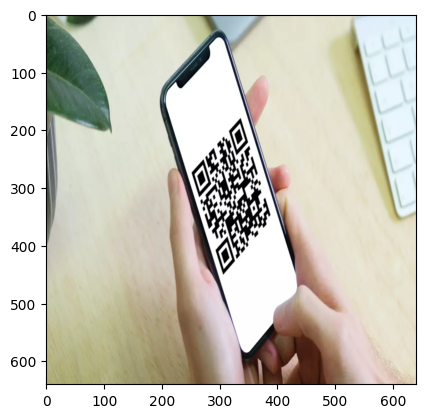

In [15]:

output_array = prediction['var_871']
print("Форма массива:", output_array.shape)

# Предоставляю код, который можно использовать для визуализации результатов модели YOLOv5.
# Пользователю нужно будет вставить реальные данные предсказания в переменную `predictions`.


draw_boxes(image,prediction)